In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('data/survey_results_public.csv')

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis =1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   EdLevel       57431 non-null  object 
 2   YearsCodePro  46349 non-null  object 
 3   Employment    63854 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [5]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34025 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   YearsCodePro  34025 non-null  object 
 3   Employment    34025 non-null  object 
 4   Salary        34025 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [9]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop ("Employment", axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [10]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [11]:
def shorten_categories(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

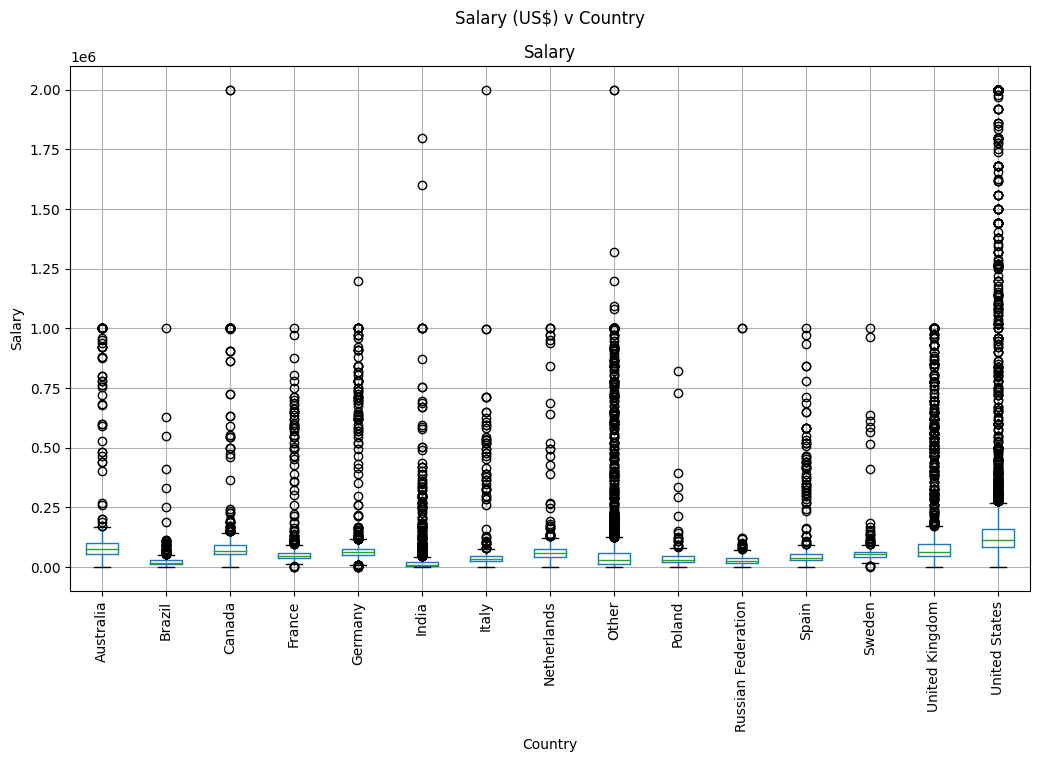

In [13]:
# inspect the salary range using a plot graph against the Countries 

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.ylabel('Salary')
plt.suptitle('Salary (US$) v Country')
plt.xticks(rotation=90)
plt.show()

In [17]:
# remove outliers 

df=df[df["Salary"] <= 300000 ]
df=df[df["Salary"] >= 100000 ]
df= df[df["Country"] != 'Other']

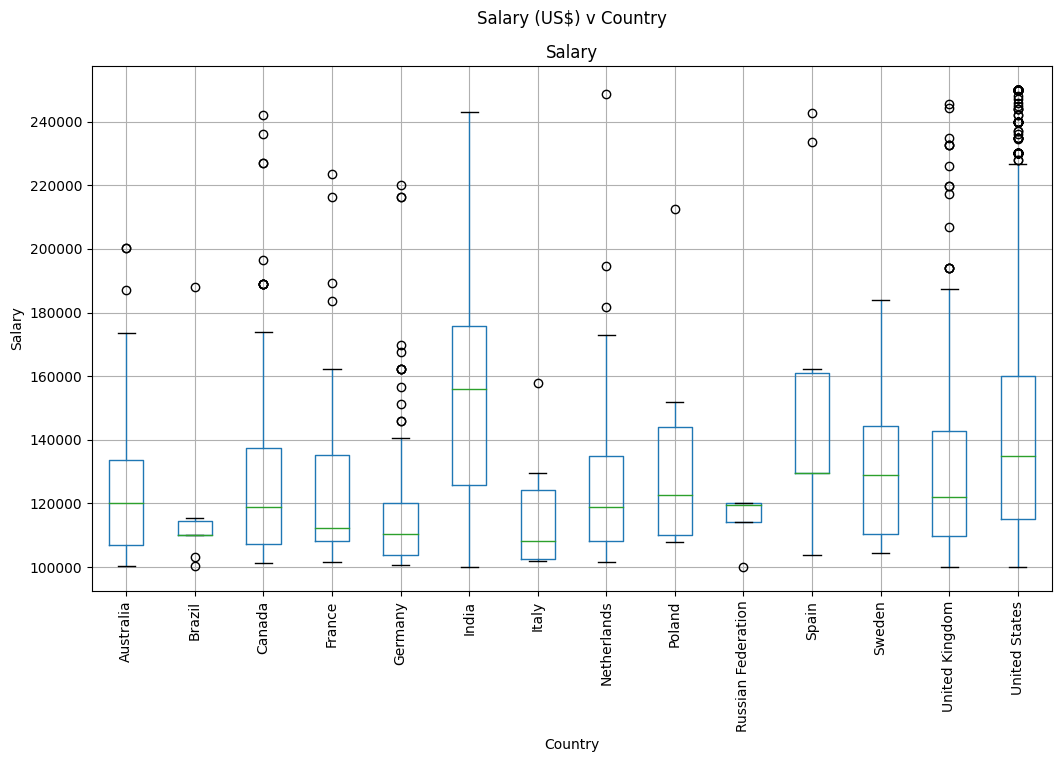

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.ylabel('Salary')
plt.suptitle('Salary (US$) v Country')
plt.xticks(rotation=90)
plt.show()

In [19]:
# clean Years of Experience

df["YearsCodePro"].unique()

array(['13', '20', '10', '29', '8', '7', '23', '15', '25', '2', '5', '21',
       '16', '4', '3', '18', '6', '11', '14', '32', '28', '19', '12',
       '22', '38', 'Less than 1 year', '30', '1', '26', '9', '17', '24',
       '34', '35', '33', '36', '40', '27', '39', 'More than 50 years',
       '31', '41', '45', '37', '42', '44', '43', '49'], dtype=object)

In [20]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro']= df['YearsCodePro'].apply(clean_experience)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 7 to 64129
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       5011 non-null   object 
 1   EdLevel       5011 non-null   object 
 2   YearsCodePro  5011 non-null   float64
 3   Salary        5011 non-null   float64
dtypes: float64(2), object(2)
memory usage: 195.7+ KB


In [22]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0,116000.0
40,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20.0,106000.0
41,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,130000.0
42,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",29.0,135000.0
47,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,125000.0


In [23]:
# clean Education Level column

df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'I never completed any formal education',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [24]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree'in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than Bachelors'

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [25]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than Bachelors',
       'Post grad'], dtype=object)

In [26]:
#transform string values to a unique value --using label encoder
from sklearn.preprocessing import LabelEncoder

#transform education level
le_education= LabelEncoder()
df['EdLevel']= le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [27]:
#transform Country values
le_country= LabelEncoder()
df['Country']= le_country.fit_transform(df['Country'])
df.Country.unique()

array([13,  2, 12,  7,  5,  4,  8,  0, 11,  9, 10,  3,  1,  6])

# Training The Model :)

In [28]:
 ## split data in features(x) and label(what we predict)
X = df.drop("Salary", axis =1)
y= df["Salary"]

In [29]:
# create model and fit data in Linear Regression model
from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [30]:
#Predict new values
y_predicted=linear_reg.predict(X)

In [31]:
#model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

rmse= np.sqrt(mean_squared_error(y,y_predicted))
mae= mean_absolute_error(y,y_predicted)

In [32]:
print(rmse) # our model is off by this value..
print(mae)

34912.730699316606
27510.960240333046


In [33]:
#decison tree regressor model

from sklearn.tree import DecisionTreeRegressor
decs_tree_reg= DecisionTreeRegressor(random_state=0)
decs_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [34]:
y_predicted = decs_tree_reg.predict(X)

In [35]:
rsme =np.sqrt(mean_squared_error (y,y_predicted))
print("${:,.02f}".format(rsme))

$32,363.77


In [36]:
# random forest regressor

from sklearn.ensemble import RandomForestRegressor
random_forest_reg= RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_predicted = random_forest_reg.predict(X)

In [38]:
rsme= np.sqrt(mean_squared_error (y,y_predicted))
print("$ {:,.02f}".format(rsme))

$ 32,535.71


In [39]:
#find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

max_depth=[None,2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor= DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters,scoring ='neg_mean_squared_error')
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [40]:
#get the best estimator

regresor= gs.best_estimator_

regressor.fit(X, y.values)
y_predicted = regressor.predict(X)
rmse= np.sqrt(mean_squared_error(y,y_predicted))
print("${:,.02f}".format(rsme))

$32,535.71


In [41]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
40,13,2,20.0
41,13,0,10.0
42,13,2,29.0
47,13,0,8.0
...,...,...,...
64083,13,2,7.0
64113,13,1,15.0
64116,13,0,6.0
64127,13,3,12.0


In [44]:
#arrays for country.edlevel,yearscode

X= np.array([["United States","Master’s degree",15] ])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [45]:
#transform the new array
X[:, 0] =le_country.transform(X[:,0])
X[:, 1] =le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [46]:
y_predicted =regressor.predict(X)
y_predicted

C:\Users\Kivy\Desktop\mlapp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([149495.73333333])

In [47]:
#save the model

import pickle

In [48]:
#save on write binary file
data= {"model":regressor, "le_country":le_country, "le_education":le_education}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [49]:
#confirm on a read binary file that saving and loading works
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
    
regressor_loaded = data["model"]
le_country= data["le_country"]
le_education = data["le_education"]

In [50]:
y_predicted= regressor_loaded.predict(X)
y_predicted

C:\Users\Kivy\Desktop\mlapp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([149495.73333333])